In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('bookings.csv')
#location_demand = pd.read_csv('location_demand.csv')

In [ ]:
#location_demand = location_demand.rename(columns={"vehicle_type": "location_vehicle_type"})

#df = bookings.merge(
#    location_demand,
#    left_on=["city", "pickup_location", "hour_of_day", "vehicle_type"],
#    right_on=["city", "pickup_location", "hour_of_day", "location_vehicle_type"],
#    how="left"
#)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

Fare Prediction Model (Regression)
Predict the expected booking value prior to trip confirmation based on:

1. Distance
2. Traffic & weather
3. Time of day
4. Vehicle type
5. Surge dynamics

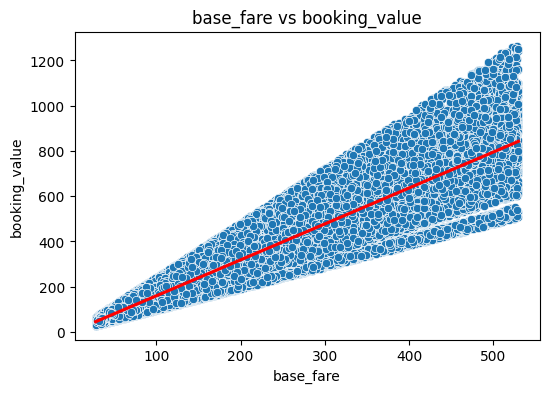

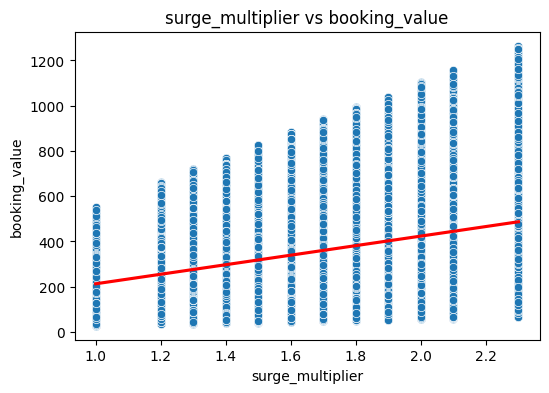

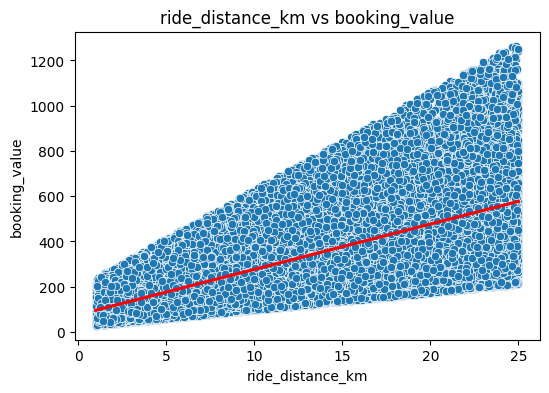

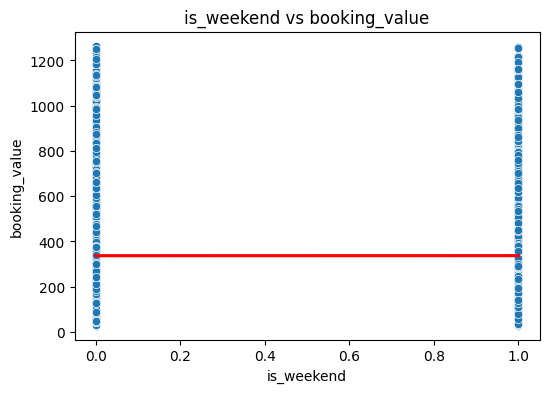

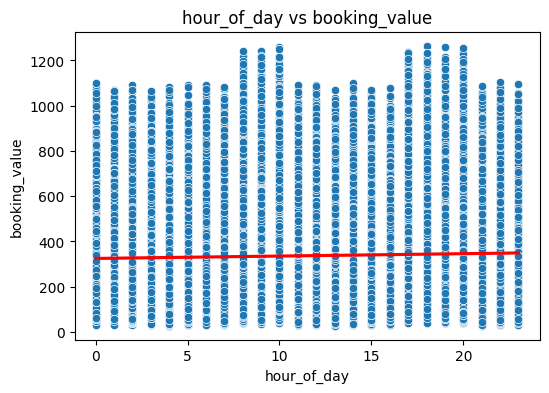

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['base_fare', 'surge_multiplier', 'ride_distance_km','is_weekend','hour_of_day']
target = 'booking_value'

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y=target)
    sns.regplot(data=df, x=col, y=target, scatter=False, color='red')  # adds a linear trend line
    plt.title(f'{col} vs {target}')
    plt.show()


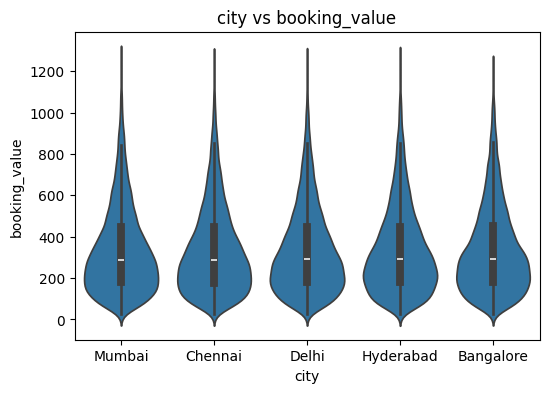

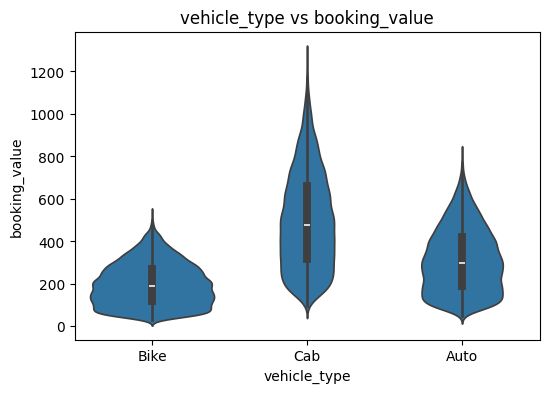

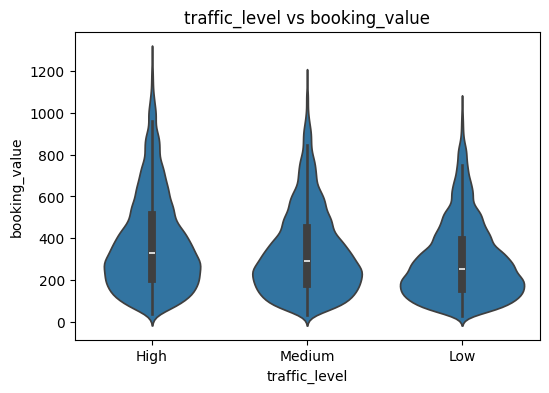

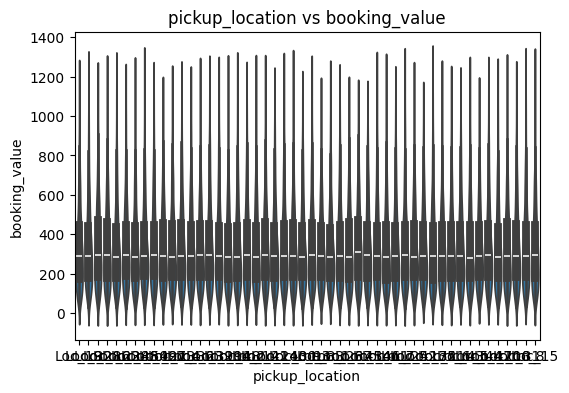

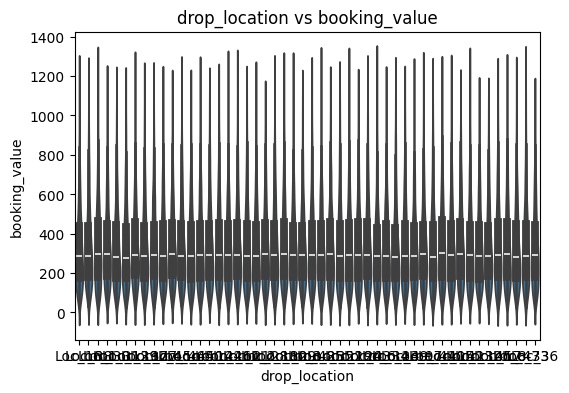

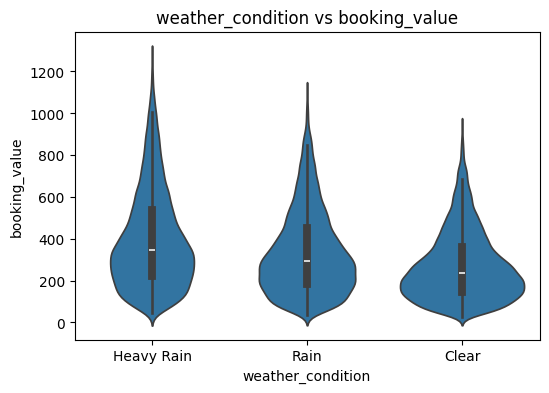

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['city', 'vehicle_type', 'traffic_level','pickup_location','drop_location', 'weather_condition']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=col, y='booking_value', data=df)
    plt.title(f'{col} vs booking_value')
    plt.show()

In [39]:
df.columns

Index(['booking_id', 'booking_date', 'booking_time', 'day_of_week',
       'is_weekend', 'hour_of_day', 'city', 'pickup_location', 'drop_location',
       'vehicle_type', 'ride_distance_km', 'estimated_ride_time_min',
       'actual_ride_time_min', 'traffic_level', 'weather_condition',
       'base_fare', 'surge_multiplier', 'booking_value', 'booking_status',
       'incomplete_ride_reason', 'customer_id', 'driver_id'],
      dtype='object')

In [40]:
drop_cols = [
    'booking_id',
    'booking_date',
    'booking_time',
    'day_of_week',
    'is_weekend',
    'city',
    'pickup_location',
    'drop_location',
    'actual_ride_time_min',
    'booking_status',
    'incomplete_ride_reason',
    'customer_id',
    'driver_id'
]

X = df.drop(columns= drop_cols + ['booking_value'])

y = df['booking_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X.columns

Index(['hour_of_day', 'vehicle_type', 'ride_distance_km',
       'estimated_ride_time_min', 'traffic_level', 'weather_condition',
       'base_fare', 'surge_multiplier'],
      dtype='object')

In [50]:
# Numerical features
numerical_cols = [
    'hour_of_day',
    'ride_distance_km',
    'estimated_ride_time_min',
    'base_fare',
    'surge_multiplier'
]
# Categorical features
categorical_cols = [
    'vehicle_type',
    'weather_condition'
]
# Ordinal features
ordinal_cols = [
    'traffic_level'
]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('ord', OrdinalEncoder(categories=[['Low', 'Medium', 'High']]), ordinal_cols)
])



In [43]:
# Linear Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
print("Linear Regression Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")


Linear Regression Performance:
R^2 Score: 0.9661
RMSE: 38.3120
MAE: 27.8589


In [48]:
# Decision Tree Pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, random_state=42))
])
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
print("\nDecision Tree Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}")



Decision Tree Performance:
R^2 Score: 0.9965
RMSE: 12.3612
MAE: 9.0435


In [51]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print("\nRandom Forest Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")


Random Forest Performance:
R^2 Score: 0.9968
RMSE: 11.7583
MAE: 8.6180
